# Lab 3
UIC CS 418, Spring 2023 - CC

## Academic Integrity Policy

According to the Academic Integrity Policy of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. 
If you have questions, please ask us on Piazza.
You must reference (including URLs) of any resources other than those linked to in the assignment, or provided by the professor or TA.

Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

We will run your code through MOSS software to detect copying and plagiarism.

## To submit this assignment:
1. Execute all commands and complete this notebook	
2. Download your Python Notebook (**.ipynb** file) and upload it to Gradescope
under *Lab 3 (.ipynb)*. **Make sure you check that your *.ipynb* file includes all parts of your solution (including the outputs).**
2.	Export your Notebook as a python file (**.py** file) and upload it to Gradescope under *.py file for Lab 3*. 


In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Practice: `matplotlib`

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

You will notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt
	
The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `sin(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

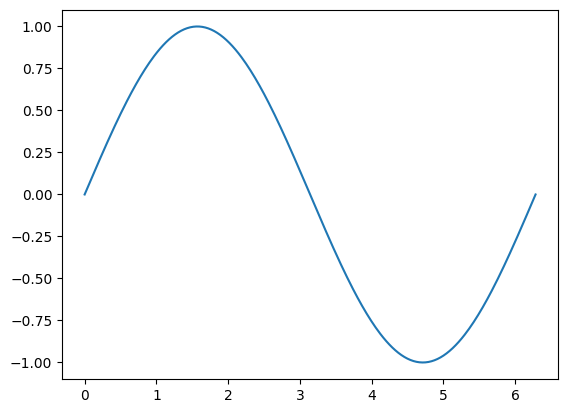

In [3]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.sin(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

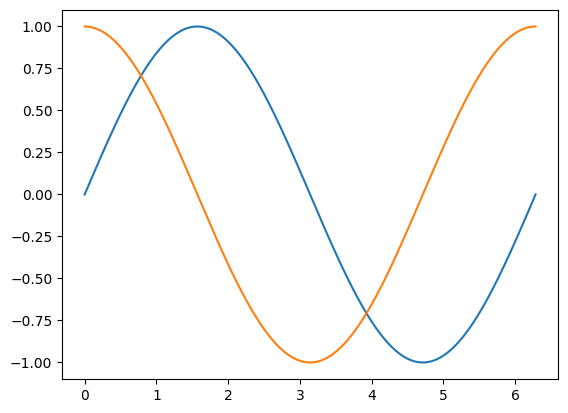

In [4]:
plt.plot(xs, ys)
plt.plot(xs, np.cos(xs))

That plot looks pretty nice but isn't presentation-ready. Luckily, `matplotlib` has a wide array of plot customizations.


## Q0:

Skim through the first part of the tutorial at https://github.com/rougier/matplotlib-tutorial to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add a legend.

![](https://drive.google.com/uc?export=view&id=1pI8u8R4uBXkaNLM9gfvMUEe5hY9BydVp)

Text(0.5, 1.0, 'Graphs of $cos(x)$ and $sin(x)$')

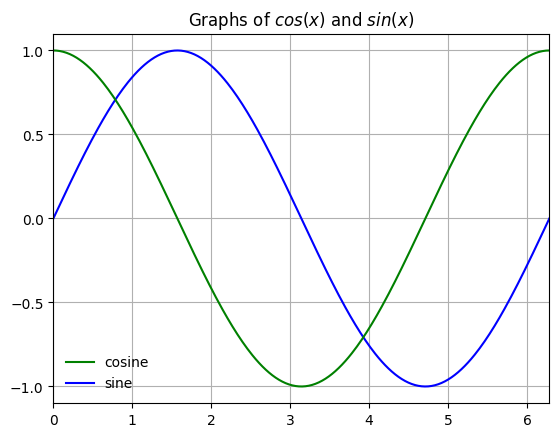

In [5]:
# Here's the starting code from last time. 
#Edit / Add code to create the plot above.
plt.plot(xs, ys, color = "blue", label = "sine")
plt.plot(xs, np.cos(xs), color = "green", label = "cosine")
plt.xlim([0,max(xs)])
plt.yticks(np.arange(-1,max(ys)+0.5,0.5))
plt.grid(axis = "both")

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc="lower left",frameon=False)

plt.title("Graphs of $cos(x)$ and $sin(x)$")

# Q1.

Load all the csv files of the divvy data into different dataframes. You will note that the column names for the first quarter are different. However, they correspond to the same thing in the other csv files. This is a common problem in datascience where small changes during data extraction can cause changes in column names.

Firstly, change the column names for the first quarter such that they match the column names as in the other quarters. Once you complete this, make a new dataframe that is a combination of all of these 4 dataframes. You may drop the trip_id, bike_id, from_station_id and to_station_id columns as they will not be needed for this lab.

You can confirm your output by adding the number of rows in each dataframe and comparing that to the dataframe you got by combining them all together.

In [6]:
q1 = pd.read_csv('Divvy_Trips_2018_Q1_uncleanned.csv')
q1.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0


In [7]:
q2 = pd.read_csv('Divvy_Trips_2018_Q2_uncleanned.csv')
q2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000527,2018-04-01 00:04:44,2018-04-01 00:13:03,3819,499.0,22,May St & Taylor St,171,May St & Cullerton St,Subscriber,Male,1994.0
1,18000528,2018-04-01 00:06:42,2018-04-01 00:27:07,5000,"1,225.0",157,Lake Shore Dr & Wellington Ave,190,Southport Ave & Wrightwood Ave,Subscriber,Male,1965.0
2,18000529,2018-04-01 00:07:19,2018-04-01 00:23:19,5165,960.0,106,State St & Pearson St,106,State St & Pearson St,Customer,NaN,NaN
3,18000530,2018-04-01 00:07:33,2018-04-01 00:14:47,3851,434.0,241,Morgan St & Polk St,171,May St & Cullerton St,Subscriber,Male,1998.0
4,18000531,2018-04-01 00:10:23,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0


In [8]:
q3 = pd.read_csv('Divvy_Trips_2018_Q3_uncleanned.csv')
q3.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,19244622,2018-07-01 00:00:03,2018-07-01 23:56:11,5429,"86,168.0",140,Dearborn Pkwy & Delaware Pl,106,State St & Pearson St,Customer,NaN,NaN
1,19244623,2018-07-01 00:00:13,2018-07-01 00:06:39,93,386.0,153,Southport Ave & Wellington Ave,250,Ashland Ave & Wellington Ave,Subscriber,Male,1986.0
2,19244624,2018-07-01 00:00:15,2018-07-01 00:23:26,2461,"1,391.0",76,Lake Shore Dr & Monroe St,301,Clark St & Schiller St,Subscriber,Female,1987.0
3,19244625,2018-07-01 00:00:25,2018-07-01 00:23:31,2991,"1,386.0",76,Lake Shore Dr & Monroe St,301,Clark St & Schiller St,Subscriber,Male,1986.0
4,19244626,2018-07-01 00:00:27,2018-07-01 00:11:23,2851,656.0,60,Dayton St & North Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1961.0


In [9]:
q4 = pd.read_csv('Divvy_Trips_2018_Q4_uncleanned.csv')
q4.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,20983530,2018-10-01 00:01:17,2018-10-01 00:29:35,4551,"1,698.0",85,Michigan Ave & Oak St,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1992.0
1,20983531,2018-10-01 00:03:59,2018-10-01 00:10:55,847,416.0,13,Wilton Ave & Diversey Pkwy,144,Larrabee St & Webster Ave,Subscriber,Female,1982.0
2,20983532,2018-10-01 00:05:14,2018-10-01 00:14:08,6188,534.0,59,Wabash Ave & Roosevelt Rd,197,Michigan Ave & Madison St,Subscriber,Male,1986.0
3,20983533,2018-10-01 00:05:48,2018-10-01 00:18:46,6372,778.0,328,Ellis Ave & 58th St,419,Lake Park Ave & 53rd St,Subscriber,Female,1960.0
4,20983534,2018-10-01 00:07:29,2018-10-01 00:25:51,1927,"1,102.0",93,Sheffield Ave & Willow St,159,Claremont Ave & Hirsch St,Subscriber,Female,1993.0


In [10]:
q1_transform = {'01 - Rental Details Rental ID' : 'trip_id',
               '01 - Rental Details Local Start Time': 'start_time',
               '01 - Rental Details Local End Time' : 'end_time',
               '01 - Rental Details Bike ID' : 'bikeid',
               '01 - Rental Details Duration In Seconds Uncapped' : 'tripduration',
               '03 - Rental Start Station ID' : 'from_station_id',
               '03 - Rental Start Station Name' : 'from_station_name',
               '02 - Rental End Station ID' : 'to_station_id',
               '02 - Rental End Station Name' : 'to_station_name',
               'User Type' : 'usertype',
               'Member Gender' : 'gender',
               '05 - Member Details Member Birthday Year' : 'birthyear'}
q1.rename(columns = q1_transform, inplace=True)
q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0


In [11]:
# data = q1.append(q2).append(q3).append(q4)
data = pd.concat([q1,q2,q3,q4],ignore_index=True)
data

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3603077,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0
3603078,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0
3603079,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0
3603080,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0


In [12]:
data = data.drop(['trip_id', 'bikeid', 'from_station_id','to_station_id'],axis=1,errors='ignore')

# Q2:
In the text cell below, identify the statistical data type of each column, i.e., Stevens' levels of measurement: Interval (Discrete), Ratio (Continuous), Nominal, Ordinal, Binary.


Examples:

*   https://www.cdc.gov/csels/dsepd/ss1978/lesson2/section2.html
*   https://www.statology.org/is-time-interval-or-ratio/




In [13]:
#TODO 

Answer here: 

<b>Column Name -> Data Type</b>

start_time -> Interval  [start time will be an interval because there is no true zero value for it]

end_time -> Interval   [end time will be an interval because there is no true zero value for it]

tripduration -> Ratio  [trip duration will be ratio data type, because there is a true zero value - zero seconds, and it can be said that 2000 seconds are double than 1000 seconds, unlike start and end time]

from_station_name -> Nominal  [From station is Nominal because Station names are categorical data with no natural order]

to_station_name -> Nominal  [To station is Nominal because Station names are categorical data with no natural order]

usertype -> Binary  [User Type is of Binary data type because it has only categories that it could belong to - 'Customer' and 'Subscriber']

gender -> Binary  [Gender is of Binary data type because according to the data, it has only categories that it could belong to - 'Male' and 'Female']

birthyear -> Interval  [Birth year will be an interval because there is no true zero value for it]

# Q3:
Take the new dataframe and see what is the data type that python gave to the columns start_time and end_time.
Convert that to the datetime format

In [14]:
print(data['start_time'].dtype, data['end_time'].dtype)

object object


In [15]:
data['start_time'] = data['start_time'].astype('datetime64[ns]')
data['end_time'] = data['end_time'].astype('datetime64[ns]')
data['tripduration'] = pd.to_numeric(data['tripduration'].str.replace(',',''))
print(data['start_time'].dtype, data['end_time'].dtype,data['tripduration'].dtype)

datetime64[ns] datetime64[ns] float64


In [16]:
data.dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
tripduration                float64
from_station_name            object
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

# Q4:
Compute the following measures for each column in the data set. 


1.   Measures of Central Tendency: Mean, Median, Mode
2.   Measures of Dispersion: Standard Deviation, Variance, Interquartile Range (IQR), Skewness, Variation Ratio

Hint 1: Find the measure that's best suited for the statistical data type. 

Hint 2: If you are getting any errors, read the error carefully, and perform any transformations needed. Are you getting an error because the measure cannot be computed for this data type? Is it because the column has unexpected values? 

Examples: 
*   http://desart.us/courses/3000/ctanddisp.html
*   https://peterstatistics.com/CrashCourse/2-SingleVar/Nominal/Nominal-1c-Center-Dispersion.html


In [17]:
data.describe(datetime_is_numeric=True)

,start_time,end_time,tripduration,birthyear
count,3603082,3603082,3.603082e+06,3.047873e+06
mean,2018-07-17 06:59:35.470140928,2018-07-17 07:23:08.608454144,1.413168e+03,1.982691e+03
min,2018-01-01 00:12:00,2018-01-01 00:17:23,6.100000e+01,1.895000e+03
25%,2018-05-26 19:21:30.249999872,2018-05-26 19:53:09.249999872,3.950000e+02,1.977000e+03
50%,2018-07-21 17:27:45,2018-07-21 18:02:16.500000,6.730000e+02,1.986000e+03
75%,2018-09-13 19:08:18.500000,2018-09-13 19:28:11.249999872,1.210000e+03,1.991000e+03
max,2018-12-31 23:59:18,2019-01-06 14:40:28,1.433640e+07,2.005000e+03
std,NaN,NaN,3.594723e+04,1.093035e+01


In [23]:
data['start_time_epochs'] = [x.timestamp() for x in data['start_time']]

In [24]:
data

,start_time,end_time,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,start_time_epochs
0,2018-01-01 00:12:00,2018-01-01 00:17:23,323.0,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,1.514766e+09
1,2018-01-01 00:41:35,2018-01-01 00:47:52,377.0,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,1.514767e+09
2,2018-01-01 00:44:46,2018-01-01 01:33:10,2904.0,LaSalle St & Washington St,Troy St & North Ave,Subscriber,Male,1989.0,1.514767e+09
3,2018-01-01 00:53:10,2018-01-01 01:05:37,747.0,Rush St & Hubbard St,Larrabee St & Oak St,Subscriber,Male,1983.0,1.514768e+09
4,2018-01-01 00:53:37,2018-01-01 00:56:40,183.0,Blue Island Ave & 18th St,Paulina St & 18th St,Subscriber,Male,1989.0,1.514768e+09
...,...,...,...,...,...,...,...,...,...
3603077,2018-12-31 23:45:17,2018-12-31 23:50:05,288.0,Dearborn St & Monroe St,Franklin St & Lake St,Subscriber,Female,1983.0,1.546300e+09
3603078,2018-12-31 23:48:48,2018-12-31 23:57:22,514.0,Dearborn St & Van Buren St (*),State St & Randolph St,Subscriber,Female,1990.0,1.546300e+09
3603079,2018-12-31 23:50:09,2018-12-31 23:57:16,427.0,Federal St & Polk St,Michigan Ave & Lake St,Subscriber,Female,1995.0,1.546300e+09
3603080,2018-12-31 23:55:04,2018-12-31 23:58:24,200.0,Clark St & Lincoln Ave,Sedgwick St & North Ave,Subscriber,Male,1999.0,1.546301e+09


In [26]:
data['start_time'].mean()

Timestamp('2018-07-17 06:59:35.470140928')

In [ ]:
# for col in ['start_time_epochs']:
#     print(data[col].mean())

### Describe in this text cell any problems that you faced and how you selected the measures per each column.


Answer here:

# Q5:
Convert the column birthyear to the current age.

In [ ]:
from datetime import datetime
year = datetime.now().year
data['age'] = year - data['birthyear']
data

# Q6.1:
Perform data cleaning: for example, identify and decide what to do with any outliers, any invalid birthyears (e.g., greater than 2023), any end time that is earlier than the start time, identify and decide what to do with any NaN or empty values etc.

*Hint: use boxplots to identify outliers in quantitative columns.*

Explain your decisions

In [ ]:
# # plt.figure()
# # plt.title('Box plot')
# # sns.boxplot(data=data['birthyear'], orient='h')
# # plt.show()
# fig, axs = plt.subplots (2,2)
# axs[0, 0].sns.boxplot(data=data['birthyear'], orient='h')
# axs[0, 0].set_title('birthyear')
# axs[0,1].sns.boxplot(data=data['tripduration'], orient='h')
# axs[0,1].set_title('tripduration')

data.loc[(data['birthyear']<=2018) & (data['start_time'] < data['end_time']) & (data['start_time'] < pd.to_datetime('2019-01-01')) & (data['tripduration'])>0 & (data['tripduration'])<0]
#data.loc[(data['birthyear']<=2018) & (data['start_time'] < data['end_time']) & (data['start_time'] < pd.to_datetime('2019-01-01')) & (data['end_time'] > pd.to_datetime('2019-01-04'))]

### Explain in this text cell how did you handle NaNs and empty values and why


Answer here:

# Q6.2:

Compute the central tendency and dispersion again (copy/paste the code from Q4)

In [ ]:
#TODO

### Did any meassure change after cleanning?

Answer here

## Q7:
Explore the newly created combined dataframe to answer the following questions.


What time range is represented here?
What was the maximum usage on a SINGLE DAY and what date/dates were those (Hint: You will need to group all trips taken in a day and then count them)

Write code in the cell below to perform your exploration.

In [ ]:
#TODO 

Type your answer (count and date) here

## Submission

You're almost done! 

After executing all commands and completing this notebook:
2. Download your Python Notebook (**.ipynb** file) and upload it to Gradescope
under *Lab 3 (.ipynb)*. **Make sure you check that your *.ipynb* file includes all parts of your solution (including the outputs).**
2.	Export your Notebook as a python file (**.py** file) and upload it to Gradescope under *.py file for Lab 3*. 